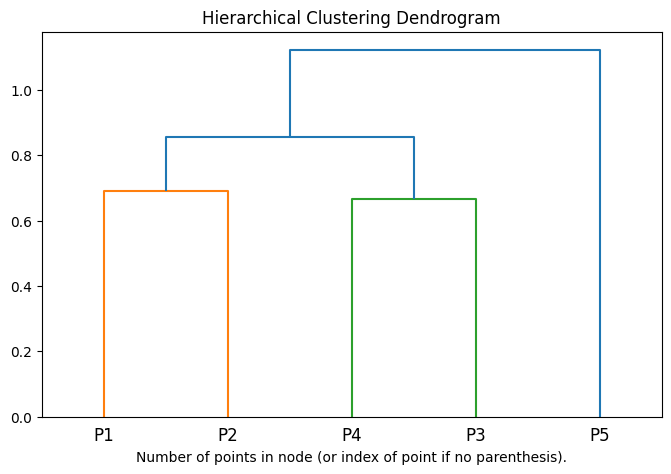

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# Load dataset
data = pd.read_csv('/content/dataset2.csv')

# Ensure column names are clean
data.columns = data.columns.str.strip()

# Select relevant columns (excluding the first column with labels)
final_data = data[['P1', 'P2', 'P3', 'P4', 'P5']]

# Perform Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='single')
model.fit(final_data)

# Function to plot the dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Plot the dendrogram
plt.figure(figsize=(8, 5))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=4, labels=['P1', 'P2', 'P3', 'P4', 'P5'])
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
